# Lecture - Pandas basics

- pandas.Series
- pandas.DataFrame
- read_csv
- indexing
- plotting

## Pandas Series

Can be created from dictionary, list, np.array

Like a hard typed dictionary

In [6]:
import pandas as pd

programs_dict = dict(AI = 26, NET = 38, Java = 30, UX = 28)

programs_series = pd.Series(programs_dict)

# type: int64 (64 bit integer)
programs_series

AI      26
NET     38
Java    30
UX      28
dtype: int64

In [16]:
# extract values through indexing
print(f"{programs_series[0] = }")
print(f"{programs_series['AI'] = }")

print(f"{programs_series[-1] = }")

# get keys (gets Index object)
# dtype = 'object' (most general type) for strings in Pandas
print(f"{programs_series.keys() = }")

programs_series[0] = 26
programs_series['AI'] = 26
programs_series[-1] = 28
programs_series.keys() = Index(['AI', 'NET', 'Java', 'UX'], dtype='object')


In [20]:
import random as rnd

rnd.seed(1337)

# list to Series gives default index 0, 1, 2...
dice_series = pd.Series([rnd.randint(1,6) for _ in range(10)])
dice_series.head()
dice_series.head(3)

0    5
1    5
2    6
dtype: int64

In [29]:
print(f"{dice_series.min() = }") 
print(f"{dice_series.argmin() = }") # index of min value
print(f"{dice_series.max() = }") 
print(f"{dice_series.mean() = }") 
print(f"{dice_series.median() = }") 

# similar to np.array methods but here you can mix types since it can go to object type
# do not loop Pandas methods??

dice_series.min() = 2
dice_series.argmin() = 7
dice_series.max() = 6
dice_series.mean() = 4.4
dice_series.median() = 5.0


## DataFrame

- tabular data with rows and columns (like an excel sheet)
- analogous to 2D np.array with flexible row indices and col names
- "specialized" dictionary with col name mapped to a Series object

In [150]:
df_programs = pd.DataFrame(programs_series, columns=("Number_of_students",))
df_programs

,Number_of_students
AI,26
NET,38
Java,30
UX,28


In [151]:
# create 2 Series objects
students = pd.Series({"AI": 26, "NET": 38, "UX": 28, "Java": 30})
skills = pd.Series({"AI": "Python", "net": "C#", "UX": "Figma", "Java": "Java"})

# create a DataFrame from 2 Series objects
df_programs = pd.DataFrame({"Students": students, "Skills": skills})
df_programs

# NaN = Not a Number

,Students,Skills
AI,26.0,Python
Java,30.0,Java
NET,38.0,NaN
UX,28.0,Figma
net,NaN,C#


In [152]:
df_programs["Students"] # because of NaN type is float64 and ints have been made float

AI      26.0
Java    30.0
NET     38.0
UX      28.0
net      NaN
Name: Students, dtype: float64

In [47]:
df_programs["Students"].mean(), (26 + 30 + 38 + 28)/4 # NaN ignored

(30.5, 30.5)

In [53]:
median_student_number = df_programs["Students"].median()
print(f"Median students in the programs {df_programs.index.to_list()}: {median_student_number:.0f}")

Median students in the programs ['AI', 'Java', 'NET', 'UX', 'net']: 29


In [54]:
# create 2 Series objects
students = pd.Series({"AI": 26, "NET": 38, "UX": 28, "Java": 30})
skills = pd.Series({"AI": "Python", "net": "C#", "UX": "Figma", "Java": "Java"})

# create a DataFrame from 2 Series objects
df_programs = pd.DataFrame({"Students": students, "Skills": skills})
df_programs


,Students,Skills
AI,26.0,Python
Java,30.0,Java
NET,38.0,NaN
UX,28.0,Figma
net,NaN,C#


In [59]:
df_programs["Skills"][0], df_programs["Skills"]["AI"]

('Python', 'Python')

## Indexers

- loc - slicing and indexing using explicit index
- iloc - slicing and indexing using Python style indexing (regular python slicing)

In [66]:
# full row
df_programs.loc["AI"] # returns a Series object

Students      26.0
Skills      Python
Name: AI, dtype: object

In [68]:
# slices rows
df_programs.iloc[1:3] # returns a DataFrame object

,Students,Skills
Java,30.0,Java
NET,38.0,NaN


## Masking

In [70]:
df_programs

,Students,Skills
AI,26.0,Python
Java,30.0,Java
NET,38.0,NaN
UX,28.0,Figma
net,NaN,C#


In [73]:
df_programs["Students"] >= 30

AI      False
Java     True
NET      True
UX      False
net     False
Name: Students, dtype: bool

In [76]:
# using masking to filter the DataFrame
df_programs[df_programs["Students"] >= 30]

,Students,Skills
Java,30.0,Java
NET,38.0,NaN


## Excel data

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("../Data/calories.xlsx")
df.head()

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FoodCategory      2225 non-null   object
 1   FoodItem          2225 non-null   object
 2   per100grams       2225 non-null   object
 3   Cals_per100grams  2225 non-null   object
 4   KJ_per100grams    2225 non-null   object
dtypes: object(5)
memory usage: 87.0+ KB


In [83]:
df.shape

(2225, 5)

In [87]:
# liquid food and solid food
df["FoodCategory"] # output Series
df["FoodCategory"].unique()

array(['CannedFruit', 'Fruits', 'Tropical&ExoticFruits', 'PotatoProducts',
       'Vegetables', 'FastFood', 'Pizza', 'Cheese', 'CreamCheese',
       'Milk&DairyProducts', 'SlicedCheese', 'Yogurt', 'Beef&Veal',
       'ColdCuts&LunchMeat', 'Meat', 'Offal&Giblets', 'Pork',
       'Poultry&Fowl', 'Sausage', 'Venison&Game', 'Cakes&Pies',
       'Candy&Sweets', 'IceCream', '(Fruit)Juices',
       'AlcoholicDrinks&Beverages', 'Beer',
       'Non-AlcoholicDrinks&Beverages', 'Soda&SoftDrinks', 'Wine',
       'CerealProducts', 'Oatmeal,Muesli&Cereals', 'Pasta&Noodles',
       'Dishes&Meals', 'Soups', 'Legumes', 'Nuts&Seeds', 'Oils&Fats',
       'VegetableOils', 'BakingIngredients', 'Fish&Seafood',
       'Herbs&Spices', 'Pastries,Breads&Rolls', 'Sauces&Dressings',
       'Spreads'], dtype=object)

In [89]:
df["per100grams"].unique()

array(['100g', '100ml'], dtype=object)

## Data cleaning and explorations

- type convert string objects with numerical values to int
- change column names
- separate into liquids and solids

In [154]:
# renaming columns
# axis = 0 is rows, axis = 1 is columns
df = df.rename(
        dict(Cals_per100grams = "Calories", KJ_per100grams = "kJ", per100grams = "per100"), 
        axis=1
    )

df.head()

,FoodCategory,FoodItem,per100,Calories,kJ
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [155]:
df["Calories"].str[:-3] # allows manipulation of values as strings
df["Calories"].str[:-3].astype(int) # type conversion to int

df["Calories"] = df["Calories"].str[:-3].astype(int)

In [159]:
df["Calories"].head() # now type int64

0    62
1    48
2    92
3    88
4    54
Name: Calories, dtype: int64

In [160]:
# counts the frequency of each value
df["per100"].value_counts()

100g     1802
100ml     423
Name: per100, dtype: int64

In [170]:
# separate liquids and solids
print((df["per100"] == "100g").value_counts())

df["per100"] == "100g" # series of bools, allows masking

df_solids = df[df["per100"] == "100g"]
df_liquids = df[df["per100"] == "100ml"]
df_liquids

True     1802
False     423
Name: per100, dtype: int64


,FoodCategory,FoodItem,per100,Calories,kJ
409,Milk&DairyProducts,Almond Milk,100ml,17,71 kJ
410,Milk&DairyProducts,Buttermilk,100ml,62,260 kJ
412,Milk&DairyProducts,Coconut Milk,100ml,230,966 kJ
422,Milk&DairyProducts,Hot Chocolate,100ml,89,374 kJ
423,Milk&DairyProducts,Kefir,100ml,55,231 kJ
...,...,...,...,...,...
2173,Sauces&Dressings,Soy Sauce,100ml,67,281 kJ
2182,Sauces&Dressings,Vinaigrette,100ml,120,504 kJ
2183,Sauces&Dressings,Worcestershire Sauce,100ml,78,328 kJ
2184,Sauces&Dressings,Yogurt Dressing,100ml,45,189 kJ


## Assignment frmo stakeholder (body builder)

- find the most calory rich solid
- find the most calory rich liquids

In [173]:
solids_sorted_calories = df_solids.sort_values(by="Calories", ascending = False)
solids_sorted_calories.iloc[:10]

,FoodCategory,FoodItem,per100,Calories,kJ
1621,Soups,Goulash,100g,1009,4238 kJ
1761,Oils&Fats,Lard,100g,902,3788 kJ
528,Beef&Veal,Beef Tallow,100g,902,3788 kJ
1756,Oils&Fats,Goose Fat,100g,898,3772 kJ
599,Meat,Chicken Fat,100g,898,3772 kJ
675,Pork,Lard,100g,898,3772 kJ
1897,BakingIngredients,Vegetable Oil,100g,884,3713 kJ
1898,BakingIngredients,Vegetable Shortening,100g,884,3713 kJ
527,Beef&Veal,Beef Suet,100g,854,3587 kJ
1768,Oils&Fats,Real Butter,100g,720,3024 kJ


In [175]:
solids_top5_calories = solids_sorted_calories.head()
solids_top5_calories

,FoodCategory,FoodItem,per100,Calories,kJ
1621,Soups,Goulash,100g,1009,4238 kJ
1761,Oils&Fats,Lard,100g,902,3788 kJ
528,Beef&Veal,Beef Tallow,100g,902,3788 kJ
1756,Oils&Fats,Goose Fat,100g,898,3772 kJ
599,Meat,Chicken Fat,100g,898,3772 kJ


In [179]:
liquids_top5_calories = df_liquids.sort_values(by="Calories", ascending=False).head()
liquids_top5_calories

,FoodCategory,FoodItem,per100,Calories,kJ
1751,Oils&Fats,Cod Liver Oil,100ml,1000,4200 kJ
1808,VegetableOils,Wheat Germ Oil,100ml,929,3902 kJ
1800,VegetableOils,Salmon Oil,100ml,911,3826 kJ
1789,VegetableOils,Menhaden Oil,100ml,911,3826 kJ
1759,Oils&Fats,Herring Oil,100ml,902,3788 kJ


In [203]:
# top five food categories by category
top5_category_median = df.groupby("FoodCategory").median("Calories").sort_values(by = "Calories", ascending = False).head().reset_index()
top5_category_median


,FoodCategory,Calories
0,VegetableOils,884.0
1,Oils&Fats,883.0
2,Nuts&Seeds,534.0
3,Candy&Sweets,448.0
4,"Oatmeal,Muesli&Cereals",373.5


In [204]:
# reset_index() used above to be able to do this
top5_category_median["FoodCategory"]

0             VegetableOils
1                 Oils&Fats
2                Nuts&Seeds
3              Candy&Sweets
4    Oatmeal,Muesli&Cereals
Name: FoodCategory, dtype: object

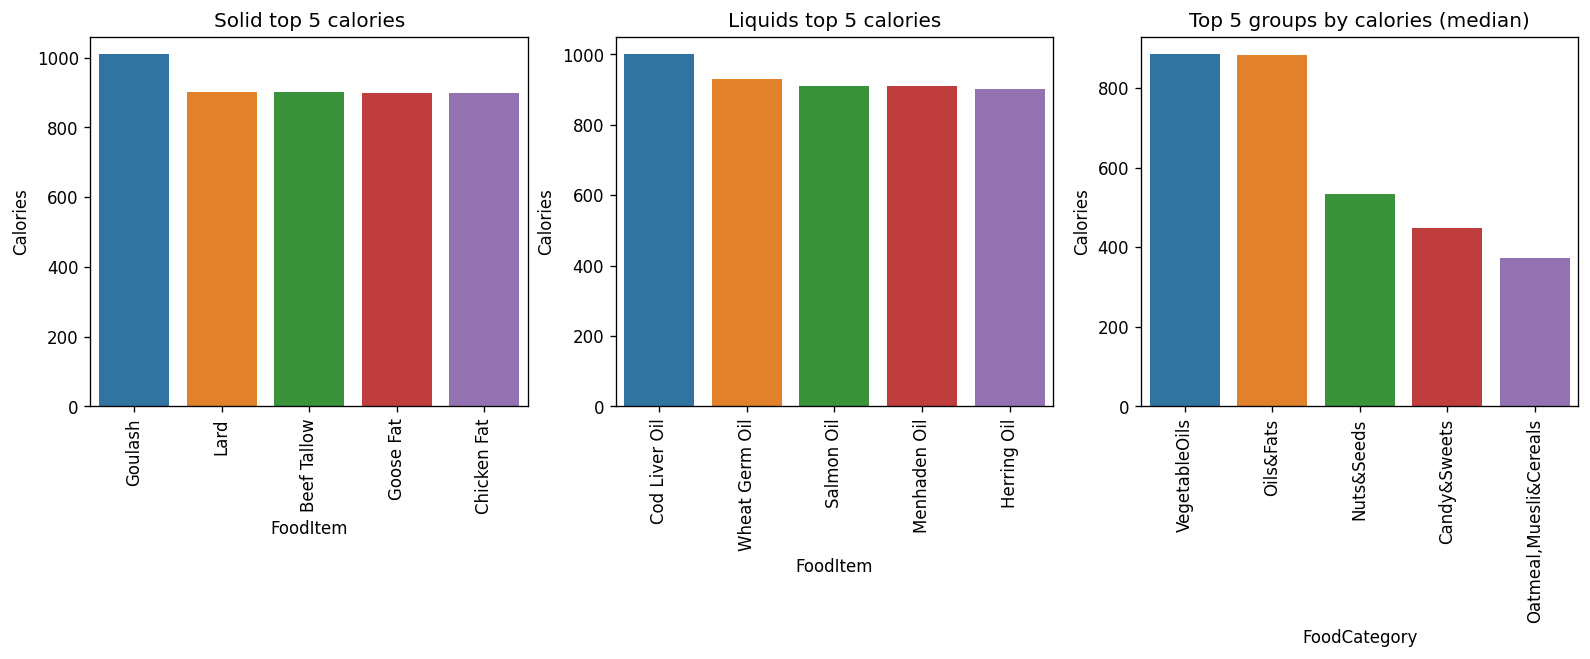

In [218]:
fig, axes = plt.subplots(1, 3, figsize = (16,4), dpi = 120)
titles = ["Solid top 5 calories", "Liquids top 5 calories", "Top 5 groups by calories (median)"]

data_frames = (solids_top5_calories, liquids_top5_calories, top5_category_median)
x_colums = ["FoodItem", "FoodItem", "FoodCategory"]

for i, (data, title) in enumerate(zip(data_frames, titles)):
    sns.barplot(data = data, x = x_colums[i], y = "Calories", ax = axes[i])
    axes[i].set(title = title)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation = 90)

plt.savefig("../Data/top_calories_food.png", facecolor = "white", bbox_inches = "tight")